In [ ]:


### 함수로 넣을 코드 최종 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! -> 프로젝트용 최종
##  스켈레톤 , 좌표 이동 코드 취합 완료 코드 



import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import math
import os

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic


class Point2D:  # 거리이동 선언 추가해본거
    def __init__(self, x, y):
        self.x = x
        self.y = y

# For static images:
# IMAGE_FILES =['김상윤 (1).jpg','김상윤 (2).jpg','교 (1).jpg']
IMAGE_FILES = ['gyo1.jpg']

#------------------------------------------------------------------------------------
def distance(IMAGE_FILES):
    dots = {}
    #list에 캡쳐사진 넣는 방식 2-  --> 성공
    # 넣고나서 주석처리해놓기 
    # for i in range(1,352):
    #     IMAGE_FILES.append(f'./cap_HouseWork/capdishwash{i}.jpg')


    #필요한 리스트 선언
    xdotlist_face=[]
    ydotlist_face=[]
    xdotlistm_face = []
    ydotlistm_face = []
    arr_sqrt_face =[]

    xdotlist_leftwrist=[]
    ydotlist_leftwrist=[]
    xdotlistm_leftwrist = []
    ydotlistm_leftwrist = []
    arr_sqrt_leftwrist =[]
    
    xdotlist_rightwrist=[]
    ydotlist_rightwrist=[]
    xdotlistm_rightwrist = []
    ydotlistm_rightwrist = []
    arr_sqrt_rightwrist =[]
    
    xdotlist_lefthip=[]
    ydotlist_lefthip=[]
    xdotlistm_lefthip = []
    ydotlistm_lefthip= []
    arr_sqrt_lefthip =[]
    
    xdotlist_righthip=[]
    ydotlist_righthip=[]
    xdotlistm_righthip = []
    ydotlistm_righthip= []
    arr_sqrt_righthip =[]
    
    
    xdotlist_leftknee=[]
    ydotlist_leftknee=[]
    xdotlistm_leftknee = []
    ydotlistm_leftknee = []
    arr_sqrt_leftknee =[]
    
    xdotlist_rightknee=[]
    ydotlist_rightknee=[]
    xdotlistm_rightknee = []
    ydotlistm_rightknee = []
    arr_sqrt_rightknee =[]    
    
    
    xdotlist_leftshoulder=[]
    ydotlist_leftshoulder=[]
    xdotlistm_leftshoulder = []
    ydotlistm_leftshoulder = []
    arr_sqrt_leftshoulder =[]   
    
    xdotlist_rightshoulder=[]
    ydotlist_rightshoulder=[]
    xdotlistm_rightshoulder = []
    ydotlistm_rightshoulder = []
    arr_sqrt_rightshoulder =[]   
    
    
    with mp_holistic.Holistic(
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            refine_face_landmarks=True) as holistic:
        for idx in range(len(IMAGE_FILES)):
            image = IMAGE_FILES[idx]
            plt.imshow(image)
            plt.show()
            image_height, image_width, _ = image.shape


            #Convert the BGR image to RGB before processing.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
            annotated_image = image.copy()


            # Draw segmentation on the image.영상에 분할을 그립니다.
            # To improve segmentation around boundaries, consider applying a joint 경계를 중심으로 분할을 개선하려면 접합 적용을 고려하십시오.
            # bilateral filter to "results.segmentation_mask" with "image".  "image"를 사용하여 "model.segmentation_mask"에 대한 양방향 필터입니다.
            condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
            bg_image = np.zeros(image.shape, dtype=np.uint8)
            #bg_image[:] = 2
            annotated_image = np.where(condition, annotated_image, bg_image)

            # Draw pose, left and right hands, and face landmarks on the image.
            mp_drawing.draw_landmarks(
                annotated_image,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.
                get_default_pose_landmarks_style())
            cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
            # Plot pose world landmarks.
            mp_drawing.plot_landmarks(
                results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
                                     


            
 

    #얼굴        
            if results.pose_landmarks:
               
                #얼굴

                globals()['x_{}nose'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y , 4))    # 얼굴

                xdotlist_face.append(globals()['x_{}nose'.format(idx)].x)
                ydotlist_face.append(globals()['x_{}nose'.format(idx)].y)
                
                #왼쪽손목

                globals()['x_{}leftwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y , 4))    # 왼쪽손목

                xdotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].x)
                ydotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].y) 
                
                #오른쪽손목


                globals()['x_{}rightwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].y , 4))    # 얼굴


                xdotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].x)
                ydotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].y)
  
                #왼쪽어깨

                globals()['x_{}leftshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].y , 4))    # 왼쪽손목

                xdotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].x)
                ydotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].y) 
                
                #오른쪽어깨


                globals()['x_{}rightshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].y , 4))    # 얼굴


                xdotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].x)
                ydotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].y)
                
                
               # 왼쪽골반

                globals()['x_{}lefthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].y , 4))    # 얼굴


                xdotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].x)
                ydotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].y)
                
                #오른쪽골반

                globals()['x_{}righthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].y , 4))    # 얼굴


                xdotlist_righthip.append(globals()['x_{}righthip'.format(idx)].x)
                ydotlist_righthip.append(globals()['x_{}righthip'.format(idx)].y)
                
                #왼쪽 다리

                globals()['x_{}leftknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].y , 4))    # 얼굴


                xdotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].x)
                ydotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].y)

                #오른쪽다리
                
                globals()['x_{}rightknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].y , 4))    # 얼굴


                xdotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].x)
                ydotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].y)                
                
                
                
                
                if idx >= 1:
                    xdotlistm_face.append((globals()['x_{}nose'.format(idx -1)].x) - (globals()['x_{}nose'.format(idx)].x))
                    ydotlistm_face.append((globals()['x_{}nose'.format(idx -1)].y) - (globals()['x_{}nose'.format(idx)].y))
                    
                    xdotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].x) - (globals()['x_{}leftwrist'.format(idx)].x))
                    ydotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].y) - (globals()['x_{}leftwrist'.format(idx)].y))
                    
                    xdotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].x) - (globals()['x_{}rightwrist'.format(idx)].x))
                    ydotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].y) - (globals()['x_{}rightwrist'.format(idx)].y))
                    
                    xdotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].x) - (globals()['x_{}leftshoulder'.format(idx)].x))
                    ydotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].y) - (globals()['x_{}leftshoulder'.format(idx)].y))
                    
                    xdotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].x) - (globals()['x_{}rightshoulder'.format(idx)].x))
                    ydotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].y) - (globals()['x_{}rightshoulder'.format(idx)].y))                    
                    
                    xdotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].x) - (globals()['x_{}lefthip'.format(idx)].x))
                    ydotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].y) - (globals()['x_{}lefthip'.format(idx)].y))
                    
                    xdotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].x) - (globals()['x_{}righthip'.format(idx)].x))
                    ydotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].y) - (globals()['x_{}righthip'.format(idx)].y))

                    xdotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].x) - (globals()['x_{}leftknee'.format(idx)].x))
                    ydotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].y) - (globals()['x_{}leftknee'.format(idx)].y))

                    xdotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].x) - (globals()['x_{}rightknee'.format(idx)].x))
                    ydotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].y) - (globals()['x_{}rightknee'.format(idx)].y))


                    
                    
                    result_face = math.sqrt((xdotlistm_face[idx - 1]*xdotlistm_face[idx  - 1]) + (ydotlistm_face[idx - 1]*ydotlistm_face[idx - 1]))
                    
                    result_leftwrist = math.sqrt((xdotlistm_leftwrist[idx - 1]*xdotlistm_leftwrist[idx  - 1]) + (ydotlistm_leftwrist[idx - 1]*ydotlistm_leftwrist[idx - 1]))
                    result_rightwrist = math.sqrt((xdotlistm_rightwrist[idx - 1]*xdotlistm_rightwrist[idx  - 1]) + (ydotlistm_rightwrist[idx - 1]*ydotlistm_rightwrist[idx - 1]))
                    
                    result_leftshoulder = math.sqrt((xdotlistm_leftshoulder[idx - 1]*xdotlistm_leftshoulder[idx  - 1]) + (ydotlistm_leftshoulder[idx - 1]*ydotlistm_leftshoulder[idx - 1]))
                    result_rightshoulder = math.sqrt((xdotlistm_rightshoulder[idx - 1]*xdotlistm_rightshoulder[idx  - 1]) + (ydotlistm_rightshoulder[idx - 1]*ydotlistm_rightshoulder[idx - 1]))     
                    
                    result_lefthip = math.sqrt((xdotlistm_lefthip[idx - 1]*xdotlistm_lefthip[idx  - 1]) + (ydotlistm_lefthip[idx - 1]*ydotlistm_lefthip[idx - 1]))
                    result_righthip = math.sqrt((xdotlistm_righthip[idx - 1]*xdotlistm_righthip[idx  - 1]) + (ydotlistm_righthip[idx - 1]*ydotlistm_righthip[idx - 1]))
                    result_leftknee = math.sqrt((xdotlistm_leftknee[idx - 1]*xdotlistm_leftknee[idx  - 1]) + (ydotlistm_leftknee[idx - 1]*ydotlistm_leftknee[idx - 1]))
                    result_rightknee = math.sqrt((xdotlistm_rightknee[idx - 1]*xdotlistm_rightknee[idx  - 1]) + (ydotlistm_rightknee[idx - 1]*ydotlistm_rightknee[idx - 1]))
                    
                    dots = {
                            'face' : result_face,
                            'leftwrist' : result_leftwrist,
                            'rightwrist' : result_rightwrist,
                            'leftshoulder' : result_leftshoulder,
                            'rightshoulder' : result_rightshoulder,
                            'leftknee' : result_leftknee,
                            'rightknee' : result_rightknee,
                            'lefthip' : result_lefthip,
                            'righthip' : result_righthip
                           }
                  

                
                else:
                     dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
            else:
                dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
                

    return dots


#.close






In [ ]:
distance(IMAGE_FILES)

In [7]:
### 스켈레톤 찍기위한 코드, 좌표 코드 
##  스켈레톤 , 좌표 이동 코드 취합 완료 코드 

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import math
import os


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic


class Point2D:  # 거리이동 선언 추가해본거
    def __init__(self, x, y):
        self.x = x
        self.y = y

# For static images:



# 얼굴 좌표이동거리 구하는 함수------------------------------------------------------------------------------------------------------
def distance_face(IMAGE_FILES):  # 자바스크립트로 받아온 파일들을 저장해놓은 변수

        #필요한 리스트 선언
    xdotlist=[]
    ydotlist=[]
    xdotlistm = []
    ydotlistm = []
    arr_sqrt_face =[]
    
    

# 있던 이미지들 넣어서 값구할때
    IMAGE_FILES =['sangyoon1.jpg','sangyoon2.jpg']

#     여러장의 사진 넣을때
#     for i in range(1,352):
#         IMAGE_FILES.append(f'./cap_HouseWork/capdishwash{i}.jpg')

    IMAGE_FILES = IMAGE_FILES



    with mp_holistic.Holistic(  #스켈레톤 설정
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            refine_face_landmarks=True) as holistic:
        
        for idx, file in enumerate(IMAGE_FILES):  #이미지파일에 넣어논 이미지들을 하나씩 꺼내오기
            image = cv2.imread(file)
            print(idx)  # 돌아간 횟수알아보기위한 출력문


            plt.imshow(image)
            plt.show()
            image_height, image_width, _ = image.shape


            #Convert the BGR image to RGB before processing.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# 좌표 찍는 부분
#             if results.pose_landmarks:
#                 print(
#                   f'LEFT_WRIST coordinates: ('
#                   f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x },' 
#                   f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y })'
#                   )
#                 globals()['x_{}'.format(idx)]= Point2D(x=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x
#                              , y=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y)    # 점1

#                 xdotlist.append(globals()['x_{}'.format(idx)].x)
#                 ydotlist.append(globals()['x_{}'.format(idx)].y) 


#                 xdotlistm.append((globals()['x_{}'.format(idx)].x) - (globals()['x_{}'.format(idx + 1)].x))
#                 ydotlistm.append((globals()['x_{}'.format(idx)].y) - (globals()['x_{}'.format(idx + 1)].y))



#                 #arr_sqrt_face.append(math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx])))
#                 result = math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx]))
#                 if result >0.02:
#                     print("active" ,result)
                    

#주석처리되있던부분
#-------------------------------------------------------------------------------------------------------------------------

# 스켈레톤 그리는 부분 

            annotated_image = image.copy()


            # Draw segmentation on the image.영상에 분할을 그립니다.
            # To improve segmentation around boundaries, consider applying a joint 경계를 중심으로 분할을 개선하려면 접합 적용을 고려하십시오.
            # bilateral filter to "results.segmentation_mask" with "image".  "image"를 사용하여 "model.segmentation_mask"에 대한 양방향 필터입니다.
            condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
            bg_image = np.zeros(image.shape, dtype=np.uint8)
            #bg_image[:] = 2
            annotated_image = np.where(condition, annotated_image, bg_image)

            # Draw pose, left and right hands, and face landmarks on the image.
            mp_drawing.draw_landmarks(
                annotated_image,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.
                get_default_pose_landmarks_style())
            cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
            # Plot pose world landmarks.
            mp_drawing.plot_landmarks(
                results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
                                     

                            
#------------------------------------------------------------------------------------------------------------------------------------------------

0


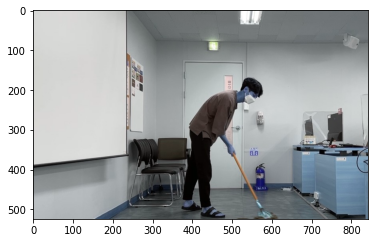

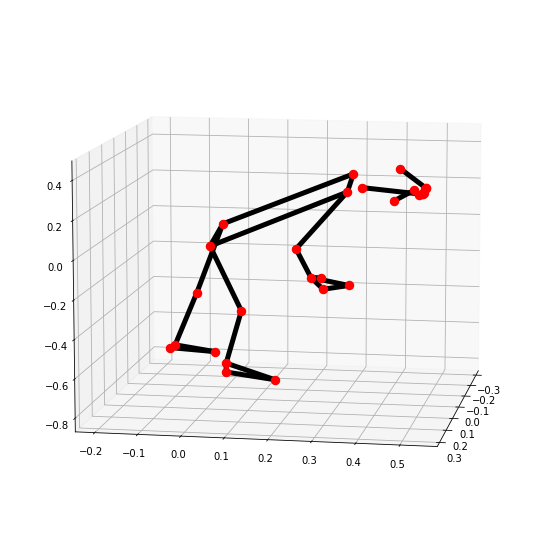

1


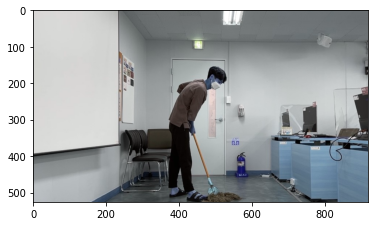

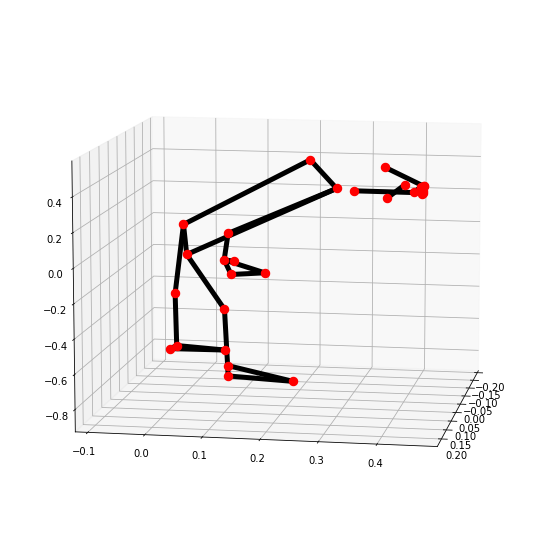

In [8]:
distance_face(IMAGE_FILES)

## test 

In [5]:
### 스켈레톤 찍기위한 코드, 좌표 코드 
##  스켈레톤 , 좌표 이동 코드 취합 완료 코드 

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import math
import os


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic


class Point2D:  # 거리이동 선언 추가해본거
    def __init__(self, x, y):
        self.x = x
        self.y = y

# For static images:
    # 있던 이미지들 넣어서 값구할때
IMAGE_FILES =['sangyoon1.jpg','sangyoon2.jpg']

#     여러장의 사진 넣을때
#     for i in range(1,352):
#         IMAGE_FILES.append(f'./cap_HouseWork/capdishwash{i}.jpg')

IMAGE_FILES = IMAGE_FILES


# 얼굴 좌표이동거리 구하는 함수------------------------------------------------------------------------------------------------------
def distance_face(IMAGE_FILES):  # 자바스크립트로 받아온 파일들을 저장해놓은 변수
    dots = {}
    #필요한 리스트 선언
    xdotlist_face=[]
    ydotlist_face=[]
    xdotlistm_face = []
    ydotlistm_face = []
    arr_sqrt_face =[]

    xdotlist_leftwrist=[]
    ydotlist_leftwrist=[]
    xdotlistm_leftwrist = []
    ydotlistm_leftwrist = []
    arr_sqrt_leftwrist =[]
    
    xdotlist_rightwrist=[]
    ydotlist_rightwrist=[]
    xdotlistm_rightwrist = []
    ydotlistm_rightwrist = []
    arr_sqrt_rightwrist =[]
    
    xdotlist_lefthip=[]
    ydotlist_lefthip=[]
    xdotlistm_lefthip = []
    ydotlistm_lefthip= []
    arr_sqrt_lefthip =[]
    
    xdotlist_righthip=[]
    ydotlist_righthip=[]
    xdotlistm_righthip = []
    ydotlistm_righthip= []
    arr_sqrt_righthip =[]
    
    
    xdotlist_leftknee=[]
    ydotlist_leftknee=[]
    xdotlistm_leftknee = []
    ydotlistm_leftknee = []
    arr_sqrt_leftknee =[]
    
    xdotlist_rightknee=[]
    ydotlist_rightknee=[]
    xdotlistm_rightknee = []
    ydotlistm_rightknee = []
    arr_sqrt_rightknee =[]    
    
    
    xdotlist_leftshoulder=[]
    ydotlist_leftshoulder=[]
    xdotlistm_leftshoulder = []
    ydotlistm_leftshoulder = []
    arr_sqrt_leftshoulder =[]   
    
    xdotlist_rightshoulder=[]
    ydotlist_rightshoulder=[]
    xdotlistm_rightshoulder = []
    ydotlistm_rightshoulder = []
    arr_sqrt_rightshoulder =[]   





    with mp_holistic.Holistic(  #스켈레톤 설정
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            refine_face_landmarks=True) as holistic:
        for idx in range(len(IMAGE_FILES)):
            image = IMAGE_FILES[idx]        
#         for idx, file in enumerate(IMAGE_FILES):  #이미지파일에 넣어논 이미지들을 하나씩 꺼내오기
#             image = cv2.imread(file)
#             print(idx)  # 돌아간 횟수알아보기위한 출력문


            plt.imshow(image)
            plt.show()
            image_height, image_width, _ = image.shape


            #Convert the BGR image to RGB before processing.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# 좌표 찍는 부분
#             if results.pose_landmarks:
#                 print(
#                   f'LEFT_WRIST coordinates: ('
#                   f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x },' 
#                   f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y })'
#                   )
#                 globals()['x_{}'.format(idx)]= Point2D(x=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x
#                              , y=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y)    # 점1

#                 xdotlist.append(globals()['x_{}'.format(idx)].x)
#                 ydotlist.append(globals()['x_{}'.format(idx)].y) 


#                 xdotlistm.append((globals()['x_{}'.format(idx)].x) - (globals()['x_{}'.format(idx + 1)].x))
#                 ydotlistm.append((globals()['x_{}'.format(idx)].y) - (globals()['x_{}'.format(idx + 1)].y))



#                 #arr_sqrt_face.append(math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx])))
#                 result = math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx]))
#                 if result >0.02:
#                     print("active" ,result)
                    

#주석처리되있던부분
#-------------------------------------------------------------------------------------------------------------------------

# 스켈레톤 그리는 부분 

            annotated_image = image.copy()


            # Draw segmentation on the image.영상에 분할을 그립니다.
            # To improve segmentation around boundaries, consider applying a joint 경계를 중심으로 분할을 개선하려면 접합 적용을 고려하십시오.
            # bilateral filter to "results.segmentation_mask" with "image".  "image"를 사용하여 "model.segmentation_mask"에 대한 양방향 필터입니다.
            condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
            bg_image = np.zeros(image.shape, dtype=np.uint8)
            #bg_image[:] = 2
            annotated_image = np.where(condition, annotated_image, bg_image)

            # Draw pose, left and right hands, and face landmarks on the image.
            mp_drawing.draw_landmarks(
                annotated_image,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.
                get_default_pose_landmarks_style())
            cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
            # Plot pose world landmarks.
            mp_drawing.plot_landmarks(
                results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
                                     

   # 좌표찍기                         
#------------------------------------------------------------------------------------------------------------------------------------------------
    #얼굴        
            if results.pose_landmarks:
               
                #얼굴

                globals()['x_{}nose'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y , 4))    # 얼굴

                xdotlist_face.append(globals()['x_{}nose'.format(idx)].x)
                ydotlist_face.append(globals()['x_{}nose'.format(idx)].y)
                
                #왼쪽손목

                globals()['x_{}leftwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y , 4))    # 왼쪽손목

                xdotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].x)
                ydotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].y) 
                
                #오른쪽손목


                globals()['x_{}rightwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].y , 4))    # 얼굴


                xdotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].x)
                ydotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].y)
  
                #왼쪽어깨

                globals()['x_{}leftshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].y , 4))    # 왼쪽손목

                xdotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].x)
                ydotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].y) 
                
                #오른쪽어깨


                globals()['x_{}rightshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].y , 4))    # 얼굴


                xdotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].x)
                ydotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].y)
                
                
               # 왼쪽골반

                globals()['x_{}lefthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].y , 4))    # 얼굴


                xdotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].x)
                ydotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].y)
                
                #오른쪽골반

                globals()['x_{}righthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].y , 4))    # 얼굴


                xdotlist_righthip.append(globals()['x_{}righthip'.format(idx)].x)
                ydotlist_righthip.append(globals()['x_{}righthip'.format(idx)].y)
                
                #왼쪽 다리

                globals()['x_{}leftknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].y , 4))    # 얼굴


                xdotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].x)
                ydotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].y)

                #오른쪽다리
                
                globals()['x_{}rightknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].y , 4))    # 얼굴


                xdotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].x)
                ydotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].y)                
                
                
                
                
                if idx >= 1:
                    xdotlistm_face.append((globals()['x_{}nose'.format(idx -1)].x) - (globals()['x_{}nose'.format(idx)].x))
                    ydotlistm_face.append((globals()['x_{}nose'.format(idx -1)].y) - (globals()['x_{}nose'.format(idx)].y))
                    
                    xdotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].x) - (globals()['x_{}leftwrist'.format(idx)].x))
                    ydotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].y) - (globals()['x_{}leftwrist'.format(idx)].y))
                    
                    xdotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].x) - (globals()['x_{}rightwrist'.format(idx)].x))
                    ydotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].y) - (globals()['x_{}rightwrist'.format(idx)].y))
                    
                    xdotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].x) - (globals()['x_{}leftshoulder'.format(idx)].x))
                    ydotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].y) - (globals()['x_{}leftshoulder'.format(idx)].y))
                    
                    xdotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].x) - (globals()['x_{}rightshoulder'.format(idx)].x))
                    ydotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].y) - (globals()['x_{}rightshoulder'.format(idx)].y))                    
                    
                    xdotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].x) - (globals()['x_{}lefthip'.format(idx)].x))
                    ydotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].y) - (globals()['x_{}lefthip'.format(idx)].y))
                    
                    xdotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].x) - (globals()['x_{}righthip'.format(idx)].x))
                    ydotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].y) - (globals()['x_{}righthip'.format(idx)].y))

                    xdotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].x) - (globals()['x_{}leftknee'.format(idx)].x))
                    ydotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].y) - (globals()['x_{}leftknee'.format(idx)].y))

                    xdotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].x) - (globals()['x_{}rightknee'.format(idx)].x))
                    ydotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].y) - (globals()['x_{}rightknee'.format(idx)].y))


                    
                    
                    result_face = math.sqrt((xdotlistm_face[idx - 1]*xdotlistm_face[idx  - 1]) + (ydotlistm_face[idx - 1]*ydotlistm_face[idx - 1]))
                    
                    result_leftwrist = math.sqrt((xdotlistm_leftwrist[idx - 1]*xdotlistm_leftwrist[idx  - 1]) + (ydotlistm_leftwrist[idx - 1]*ydotlistm_leftwrist[idx - 1]))
                    result_rightwrist = math.sqrt((xdotlistm_rightwrist[idx - 1]*xdotlistm_rightwrist[idx  - 1]) + (ydotlistm_rightwrist[idx - 1]*ydotlistm_rightwrist[idx - 1]))
                    
                    result_leftshoulder = math.sqrt((xdotlistm_leftshoulder[idx - 1]*xdotlistm_leftshoulder[idx  - 1]) + (ydotlistm_leftshoulder[idx - 1]*ydotlistm_leftshoulder[idx - 1]))
                    result_rightshoulder = math.sqrt((xdotlistm_rightshoulder[idx - 1]*xdotlistm_rightshoulder[idx  - 1]) + (ydotlistm_rightshoulder[idx - 1]*ydotlistm_rightshoulder[idx - 1]))     
                    
                    result_lefthip = math.sqrt((xdotlistm_lefthip[idx - 1]*xdotlistm_lefthip[idx  - 1]) + (ydotlistm_lefthip[idx - 1]*ydotlistm_lefthip[idx - 1]))
                    result_righthip = math.sqrt((xdotlistm_righthip[idx - 1]*xdotlistm_righthip[idx  - 1]) + (ydotlistm_righthip[idx - 1]*ydotlistm_righthip[idx - 1]))
                    result_leftknee = math.sqrt((xdotlistm_leftknee[idx - 1]*xdotlistm_leftknee[idx  - 1]) + (ydotlistm_leftknee[idx - 1]*ydotlistm_leftknee[idx - 1]))
                    result_rightknee = math.sqrt((xdotlistm_rightknee[idx - 1]*xdotlistm_rightknee[idx  - 1]) + (ydotlistm_rightknee[idx - 1]*ydotlistm_rightknee[idx - 1]))
                    
                    dots = {
                            'face' : result_face,
                            'leftwrist' : result_leftwrist,
                            'rightwrist' : result_rightwrist,
                            'leftshoulder' : result_leftshoulder,
                            'rightshoulder' : result_rightshoulder,
                            'leftknee' : result_leftknee,
                            'rightknee' : result_rightknee,
                            'lefthip' : result_lefthip,
                            'righthip' : result_righthip
                           }
                  

                
                else:
                     dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
            else:
                dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
                

    return dots


TypeError: Image data of dtype <U13 cannot be converted to float

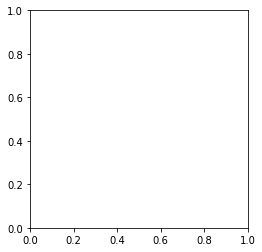

In [6]:
distance_face(IMAGE_FILES)

In [36]:
### 스켈레톤 찍기위한 코드, 좌표 코드 
##  스켈레톤 , 좌표 이동 코드 취합 완료 코드 

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import math
import os


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic


class Point2D:  # 거리이동 선언 추가해본거
    def __init__(self, x, y):
        self.x = x
        self.y = y

# For static images:



# 얼굴 좌표이동거리 구하는 함수------------------------------------------------------------------------------------------------------
def distance_face(IMAGE_FILES):  # 자바스크립트로 받아온 파일들을 저장해놓은 변수

    dots = {}
    #필요한 리스트 선언
    xdotlist_face=[]
    ydotlist_face=[]
    xdotlistm_face = []
    ydotlistm_face = []
    arr_sqrt_face =[]

    xdotlist_leftwrist=[]
    ydotlist_leftwrist=[]
    xdotlistm_leftwrist = []
    ydotlistm_leftwrist = []
    arr_sqrt_leftwrist =[]
    
    xdotlist_rightwrist=[]
    ydotlist_rightwrist=[]
    xdotlistm_rightwrist = []
    ydotlistm_rightwrist = []
    arr_sqrt_rightwrist =[]
    
    xdotlist_lefthip=[]
    ydotlist_lefthip=[]
    xdotlistm_lefthip = []
    ydotlistm_lefthip= []
    arr_sqrt_lefthip =[]
    
    xdotlist_righthip=[]
    ydotlist_righthip=[]
    xdotlistm_righthip = []
    ydotlistm_righthip= []
    arr_sqrt_righthip =[]
    
    
    xdotlist_leftknee=[]
    ydotlist_leftknee=[]
    xdotlistm_leftknee = []
    ydotlistm_leftknee = []
    arr_sqrt_leftknee =[]
    
    xdotlist_rightknee=[]
    ydotlist_rightknee=[]
    xdotlistm_rightknee = []
    ydotlistm_rightknee = []
    arr_sqrt_rightknee =[]    
    
    
    xdotlist_leftshoulder=[]
    ydotlist_leftshoulder=[]
    xdotlistm_leftshoulder = []
    ydotlistm_leftshoulder = []
    arr_sqrt_leftshoulder =[]   
    
    xdotlist_rightshoulder=[]
    ydotlist_rightshoulder=[]
    xdotlistm_rightshoulder = []
    ydotlistm_rightshoulder = []
    arr_sqrt_rightshoulder =[]   

#         #필요한 리스트 선언
    xdotlist=[]
    ydotlist=[]
    xdotlistm = []
    ydotlistm = []
    arr_sqrt_face =[]
    
    

# 있던 이미지들 넣어서 값구할때
    IMAGE_FILES =['sangyoon1.jpg','sangyoon2.jpg']

#     여러장의 사진 넣을때
#     for i in range(1,352):
#         IMAGE_FILES.append(f'./cap_HouseWork/capdishwash{i}.jpg')

    IMAGE_FILES = IMAGE_FILES



    with mp_holistic.Holistic(  #스켈레톤 설정
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            refine_face_landmarks=True) as holistic:
        
        for idx, file in enumerate(IMAGE_FILES):  #이미지파일에 넣어논 이미지들을 하나씩 꺼내오기
            image = cv2.imread(file)
            print(idx)  # 돌아간 횟수알아보기위한 출력문


            plt.imshow(image)
            plt.show()
            image_height, image_width, _ = image.shape


            #Convert the BGR image to RGB before processing.
            results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# 비교할 현재 좌표 프린트 찍는 부분
            if results.pose_landmarks:
                print(
                  f'NOSE(face) coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y })'
                  )
                print(
                  f'LEFT_WRIST coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y })'
                  )                
                print(
                  f'RIGHT_WRIST coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].y })'
                  )
                print(
                  f'LEFT_SHOULDER coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].y })'
                  )                           
                print(
                  f'RIGHT_SHOULDER coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].y })'
                  )
                print(
                  f'LEFT_HIP coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].y })'
                  )
                print(
                  f'RIGHT_HIP coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].y })'
                  )
                
                print(
                  f'LEFT_KNEE coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].y })'
                  )
                print(
                  f'RIGHT_KNEE coordinates: ('
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].x },' 
                  f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].y })'
                  )
            
#                 globals()['x_{}'.format(idx)]= Point2D(x=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x
#                              , y=results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y)    # 점1

#                 xdotlist.append(globals()['x_{}'.format(idx)].x)
#                 ydotlist.append(globals()['x_{}'.format(idx)].y) 


#                 xdotlistm.append((globals()['x_{}'.format(idx)].x) - (globals()['x_{}'.format(idx + 1)].x))
#                 ydotlistm.append((globals()['x_{}'.format(idx)].y) - (globals()['x_{}'.format(idx + 1)].y))



#                 #arr_sqrt_face.append(math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx])))
#                 result = math.sqrt((xdotlistm[idx]*xdotlistm[idx]) + (ydotlistm[idx]*ydotlistm[idx]))
#                 if result >0.02:
#                     print("active" ,result)
                    

#-------------------------------------------------------------------------------------------------------------------------

# 스켈레톤 그리는 부분 

            annotated_image = image.copy()


            # Draw segmentation on the image.영상에 분할을 그립니다.
            # To improve segmentation around boundaries, consider applying a joint 경계를 중심으로 분할을 개선하려면 접합 적용을 고려하십시오.
            # bilateral filter to "results.segmentation_mask" with "image".  "image"를 사용하여 "model.segmentation_mask"에 대한 양방향 필터입니다.
            condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
            bg_image = np.zeros(image.shape, dtype=np.uint8)
            #bg_image[:] = 2
            annotated_image = np.where(condition, annotated_image, bg_image)

            # Draw pose, left and right hands, and face landmarks on the image.
            mp_drawing.draw_landmarks(
                annotated_image,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.
                get_default_pose_landmarks_style())
            cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
            # Plot pose world landmarks.
            mp_drawing.plot_landmarks(
                results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
                                     

                            
#------------------------------------------------------------------------------------------------------------------------------------------------
#움직임캐치

            if results.pose_landmarks:
               
                #얼굴

                globals()['x_{}nose'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y , 4))    # 얼굴
                
                
                print_nose = Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y , 4))
                print(print_nose)
                
                xdotlist_face.append(globals()['x_{}nose'.format(idx)].x)
                ydotlist_face.append(globals()['x_{}nose'.format(idx)].y)
                
                #왼쪽손목

                globals()['x_{}leftwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_WRIST].y , 4))    # 왼쪽손목

                xdotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].x)
                ydotlist_leftwrist.append(globals()['x_{}leftwrist'.format(idx)].y) 
                
                #오른쪽손목


                globals()['x_{}rightwrist'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST].y , 4))    # 얼굴


                xdotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].x)
                ydotlist_rightwrist.append(globals()['x_{}rightwrist'.format(idx)].y)
  
                #왼쪽어깨

                globals()['x_{}leftshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].y , 4))    # 왼쪽손목

                xdotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].x)
                ydotlist_leftshoulder.append(globals()['x_{}leftshoulder'.format(idx)].y) 
                
                #오른쪽어깨


                globals()['x_{}rightshoulder'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER].y , 4))    # 얼굴


                xdotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].x)
                ydotlist_rightshoulder.append(globals()['x_{}rightshoulder'.format(idx)].y)
                
                
               # 왼쪽골반

                globals()['x_{}lefthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_HIP].y , 4))    # 얼굴


                xdotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].x)
                ydotlist_lefthip.append(globals()['x_{}lefthip'.format(idx)].y)
                
                #오른쪽골반

                globals()['x_{}righthip'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_HIP].y , 4))    # 얼굴


                xdotlist_righthip.append(globals()['x_{}righthip'.format(idx)].x)
                ydotlist_righthip.append(globals()['x_{}righthip'.format(idx)].y)
                
                #왼쪽 다리

                globals()['x_{}leftknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_KNEE].y , 4))    # 얼굴


                xdotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].x)
                ydotlist_leftknee.append(globals()['x_{}leftknee'.format(idx)].y)

                #오른쪽다리
                
                globals()['x_{}rightknee'.format(idx)]= Point2D(x=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].x,4)
                             , y=round(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_KNEE].y , 4))    # 얼굴


                xdotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].x)
                ydotlist_rightknee.append(globals()['x_{}rightknee'.format(idx)].y)
                

                
                
                
                
                if idx >= 1:
                    xdotlistm_face.append((globals()['x_{}nose'.format(idx -1)].x) - (globals()['x_{}nose'.format(idx)].x))
                    ydotlistm_face.append((globals()['x_{}nose'.format(idx -1)].y) - (globals()['x_{}nose'.format(idx)].y))
                    
                    xdotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].x) - (globals()['x_{}leftwrist'.format(idx)].x))
                    ydotlistm_leftwrist.append((globals()['x_{}leftwrist'.format(idx -1)].y) - (globals()['x_{}leftwrist'.format(idx)].y))
                    
                    xdotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].x) - (globals()['x_{}rightwrist'.format(idx)].x))
                    ydotlistm_rightwrist.append((globals()['x_{}rightwrist'.format(idx -1)].y) - (globals()['x_{}rightwrist'.format(idx)].y))
                    
                    xdotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].x) - (globals()['x_{}leftshoulder'.format(idx)].x))
                    ydotlistm_leftshoulder.append((globals()['x_{}leftshoulder'.format(idx -1)].y) - (globals()['x_{}leftshoulder'.format(idx)].y))
                    
                    xdotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].x) - (globals()['x_{}rightshoulder'.format(idx)].x))
                    ydotlistm_rightshoulder.append((globals()['x_{}rightshoulder'.format(idx -1)].y) - (globals()['x_{}rightshoulder'.format(idx)].y))                    
                    
                    xdotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].x) - (globals()['x_{}lefthip'.format(idx)].x))
                    ydotlistm_lefthip.append((globals()['x_{}lefthip'.format(idx -1)].y) - (globals()['x_{}lefthip'.format(idx)].y))
                    
                    xdotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].x) - (globals()['x_{}righthip'.format(idx)].x))
                    ydotlistm_righthip.append((globals()['x_{}righthip'.format(idx -1)].y) - (globals()['x_{}righthip'.format(idx)].y))

                    xdotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].x) - (globals()['x_{}leftknee'.format(idx)].x))
                    ydotlistm_leftknee.append((globals()['x_{}leftknee'.format(idx -1)].y) - (globals()['x_{}leftknee'.format(idx)].y))

                    xdotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].x) - (globals()['x_{}rightknee'.format(idx)].x))
                    ydotlistm_rightknee.append((globals()['x_{}rightknee'.format(idx -1)].y) - (globals()['x_{}rightknee'.format(idx)].y))


                    
                    
                    result_face = math.sqrt((xdotlistm_face[idx - 1]*xdotlistm_face[idx  - 1]) + (ydotlistm_face[idx - 1]*ydotlistm_face[idx - 1]))
                    
                    result_leftwrist = math.sqrt((xdotlistm_leftwrist[idx - 1]*xdotlistm_leftwrist[idx  - 1]) + (ydotlistm_leftwrist[idx - 1]*ydotlistm_leftwrist[idx - 1]))
                    result_rightwrist = math.sqrt((xdotlistm_rightwrist[idx - 1]*xdotlistm_rightwrist[idx  - 1]) + (ydotlistm_rightwrist[idx - 1]*ydotlistm_rightwrist[idx - 1]))
                    
                    result_leftshoulder = math.sqrt((xdotlistm_leftshoulder[idx - 1]*xdotlistm_leftshoulder[idx  - 1]) + (ydotlistm_leftshoulder[idx - 1]*ydotlistm_leftshoulder[idx - 1]))
                    result_rightshoulder = math.sqrt((xdotlistm_rightshoulder[idx - 1]*xdotlistm_rightshoulder[idx  - 1]) + (ydotlistm_rightshoulder[idx - 1]*ydotlistm_rightshoulder[idx - 1]))     
                    
                    result_lefthip = math.sqrt((xdotlistm_lefthip[idx - 1]*xdotlistm_lefthip[idx  - 1]) + (ydotlistm_lefthip[idx - 1]*ydotlistm_lefthip[idx - 1]))
                    result_righthip = math.sqrt((xdotlistm_righthip[idx - 1]*xdotlistm_righthip[idx  - 1]) + (ydotlistm_righthip[idx - 1]*ydotlistm_righthip[idx - 1]))
                    result_leftknee = math.sqrt((xdotlistm_leftknee[idx - 1]*xdotlistm_leftknee[idx  - 1]) + (ydotlistm_leftknee[idx - 1]*ydotlistm_leftknee[idx - 1]))
                    result_rightknee = math.sqrt((xdotlistm_rightknee[idx - 1]*xdotlistm_rightknee[idx  - 1]) + (ydotlistm_rightknee[idx - 1]*ydotlistm_rightknee[idx - 1]))
                    
                    movements_dots = {
                            'face' : result_face,
                            'leftwrist' : result_leftwrist,
                            'rightwrist' : result_rightwrist,
                            'leftshoulder' : result_leftshoulder,
                            'rightshoulder' : result_rightshoulder,
                            'leftknee' : result_leftknee,
                            'rightknee' : result_rightknee,
                            'lefthip' : result_lefthip,
                            'righthip' : result_righthip
                           }
                    
                    #움직임 결과 확인용 프린트
                    print( f'movements_dots :'
                          f'{movements_dots}' )
                    

                
                else:
                     movements_dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
            else:
                movements_dots = {
                            'face' : 0,
                            'leftwrist' :0,
                            'rightwrist' : 0,
                            'leftshoulder' : 0,
                            'rightshoulder' : 0,
                            'leftknee' : 0,
                            'rightknee' : 0,
                            'lefthip' : 0,
                            'righthip' : 0
                           }
                

    return movements_dots



0


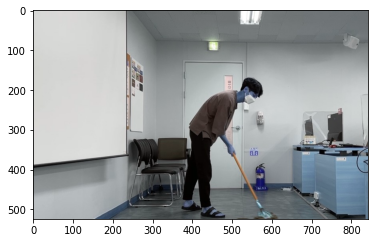

NOSE(face) coordinates: (0.653278648853302,0.4276919960975647)
LEFT_WRIST coordinates: (0.5861309766769409,0.6365516781806946)
RIGHT_WRIST coordinates: (0.575465977191925,0.6413761377334595)
LEFT_SHOULDER coordinates: (0.5930947661399841,0.4403224587440491)
RIGHT_SHOULDER coordinates: (0.5847446918487549,0.43712618947029114)
LEFT_HIP coordinates: (0.49798208475112915,0.6007047891616821)
RIGHT_HIP coordinates: (0.49692922830581665,0.6113733649253845)
LEFT_KNEE coordinates: (0.482994019985199,0.7616490125656128)
RIGHT_KNEE coordinates: (0.5029035210609436,0.7805576324462891)


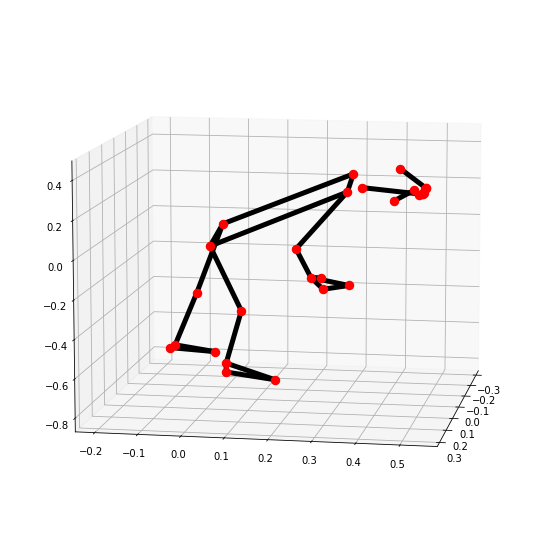

1


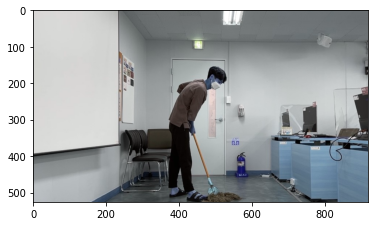

NOSE(face) coordinates: (0.5523005723953247,0.394203245639801)
LEFT_WRIST coordinates: (0.439971387386322,0.5477257370948792)
RIGHT_WRIST coordinates: (0.4721061885356903,0.6054617762565613)
LEFT_SHOULDER coordinates: (0.4888474643230438,0.3881569504737854)
RIGHT_SHOULDER coordinates: (0.5066867470741272,0.4200403094291687)
LEFT_HIP coordinates: (0.4298914074897766,0.5947384834289551)
RIGHT_HIP coordinates: (0.44441697001457214,0.6054763197898865)
LEFT_KNEE coordinates: (0.4287698268890381,0.7667399644851685)
RIGHT_KNEE coordinates: (0.44823309779167175,0.7814339399337769)


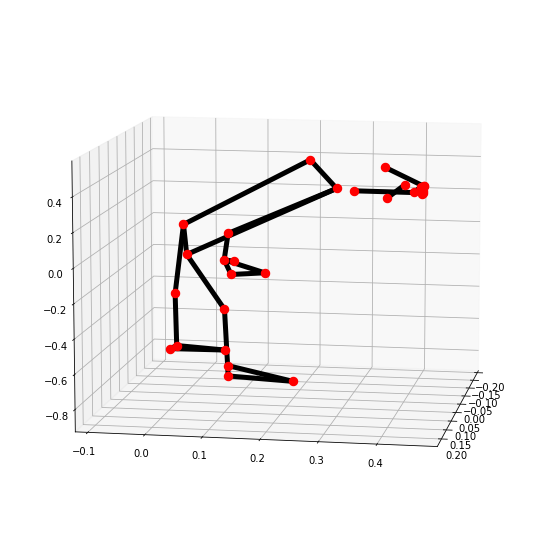

movements_dots :{'face': 0.10641076073405357, 'leftwrist': 0.17102169453025545, 'rightwrist': 0.10945487654736993, 'leftshoulder': 0.11658859292400776, 'rightshoulder': 0.07985242638768088, 'leftknee': 0.05443941586754947, 'rightknee': 0.054705849778611454, 'lefthip': 0.06836380621352207, 'righthip': 0.0528304836245136}
움직임 결과 : active한 상태입니다


In [40]:
distance_face(IMAGE_FILES)
print("움직임 결과 : active한 상태입니다")